In [1]:
# Import the required packages
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy
import math
import random
import string
import tensorflow as tf

random.seed(123)
# Display plots inline 
%matplotlib inline
# Define plot's default figure size
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

   Feature1  Feature2  Target
0  2.067788  0.258133       1
1  0.993994 -0.609145       1
2 -0.690315  0.749921       0
3  1.023582  0.529003       0
4  0.700747 -0.496724       1

[5 rows x 3 columns]
(500, 2) (500,)


/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


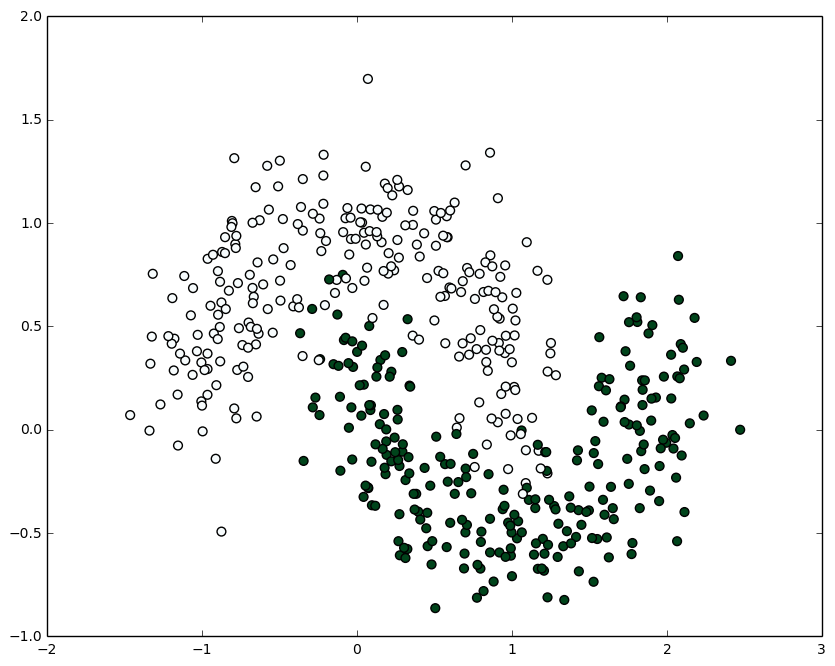

In [2]:
# get the daat
train = pd.read_csv("intro_to_ann.csv")
print (train.head())
train_X, train_Y = np.array(train.ix[:,0:2]), np.array(train.ix[:,2])
print(train_X.shape, train_Y.shape)
plt.scatter(train_X[:,0], train_X[:,1], s=40, c=train_Y, cmap=plt.cm.BuGn)
n_samples = train_X.shape[0]

In [3]:
# grab number of features and training size from train_X
train_size, num_features = train_X.shape
print(train_size, num_features)

# training epochs
epochs = 2000
# number of labels in data
num_labels = 2
# learning rate
learning_rate = 0.01
# number of hidden nodes
num_hidden = 4

# convert labels to one-hot matrix
labels_onehot = (np.arange(num_labels) == train_Y[:, None]).astype(np.float32)

print(labels_onehot.shape)

500 2
(500, 2)


In [4]:
# tf Graph Input
x = tf.placeholder(tf.float32, shape=[None, num_features])
y_ = tf.placeholder(tf.float32, shape=[None, num_labels])

# Set model weights --> set weights to an initial random value
Wh = tf.Variable(tf.random_normal([num_features, num_hidden]))
bh = tf.Variable(tf.zeros([num_hidden]))
W = tf.Variable(tf.random_normal([num_hidden, num_labels]))
b = tf.Variable(tf.zeros([num_labels]))

# Construct a linear model
hidden_layer = tf.nn.softmax(tf.add(tf.matmul(x,Wh), bh))
y = tf.nn.softmax(tf.add(tf.matmul(hidden_layer,W), b))

# for no hidden layer, comment out weights, models above and uncomment three below
#W = tf.Variable(tf.random_normal([num_features, num_labels]))
#b = tf.Variable(tf.zeros([num_labels]))
#y = tf.nn.softmax(tf.add(tf.matmul(x,W), b))

# Mean squared error
cost = -tf.reduce_sum(y_*tf.log(y))

# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Initializing the variables
init = tf.initialize_all_variables()

In [5]:
# Launch the graph
errors = []
with tf.Session() as sess:
    sess.run(init)
    print('Initialized Session.')
    for step in range(epochs):
        # run optimizer at each step in training
        optimizer.run(feed_dict={x: train_X, y_: labels_onehot})
        # fill errors array with updated error values
        accuracy_value = accuracy.eval(feed_dict={x: train_X, y_: labels_onehot})
        errors.append(1 - accuracy_value)
    print('Optimization Finished!')
    print('Weight matrix then bias matrix from training:')
    print(sess.run(W))
    print(sess.run(b))
    
    # output final error
    print("Final error found: ", errors[-1])

Initialized Session.
Optimization Finished!
Weight matrix then bias matrix from training:
[[-4.24211836  2.88491917]
 [ 4.32725811 -3.78417349]
 [-3.18591332  4.91937256]
 [ 3.39264441 -2.32500362]]
[-0.25724065  0.25725603]
Final error found:  0.0379999876022


/usr/local/lib/python3.4/dist-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


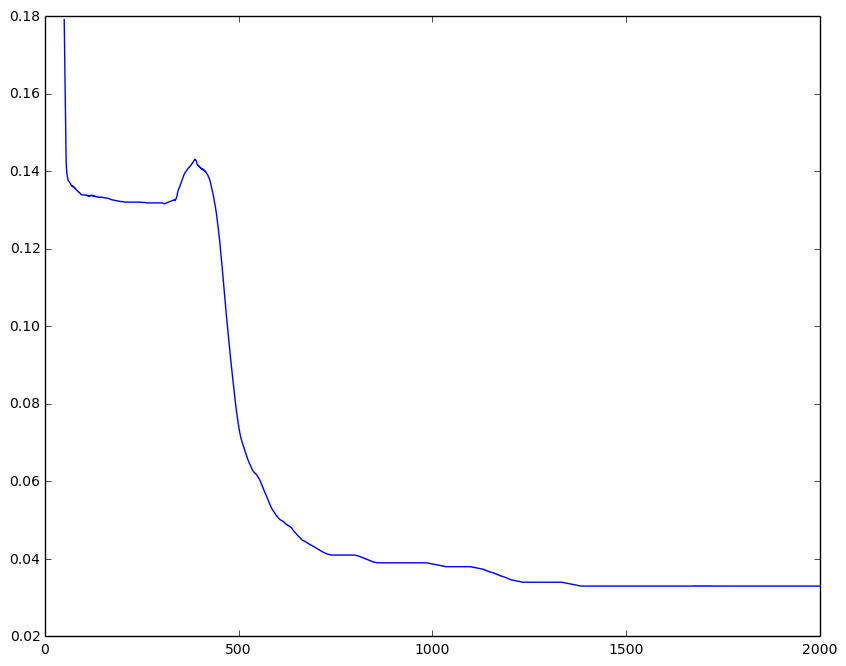

In [6]:
# plot errors array to see how it decreased
plt.plot([np.mean(errors[i-50:i]) for i in range(len(errors))])
plt.show()